Import Packages

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Intermission variables (only for sporting events)

In [2]:
# Set times to when each intermission starts
time_str1 = "19:45"
time_str2 = "20:55"


### **How to get data from Oracle**

#### ***Closed Checks Data***
1. Login and go to **"Library"**
2. In **"Name"**, type in **"Closed Checks"** and click the first result
3. Go to **"Edit Parameters"**, and change **"Business Dates"** to the date of the event, change **"Locations"** to **"Scotiabank Arena"**, and **"Revenue Center"** to **"QS Grab"**, click **"Run"**
4. In the **"Closed Checks Detail"** table, go to **"Manage Columns"**, and change the **"Split from Check"** column to **"Check Duration"**, click **"Run"**
5. Click the download button (arrow pointing down)
6. Load csv. file into variable <mark>"closed_checks"</mark>

    **Example:** `closed_checks = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/Closed Checks.csv',  skiprows=3, date_format=date_format)`

### **Closed Checks Data Cleaning**
 



In [2]:
#Data cleaning
date_format = '%H:%M:%S'

# Input path to csv. file in code
closed_checks = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/Closed Checks (12).csv',  skiprows=3, date_format=date_format) #Skips first 3 rows in csv when loading in df 

closed_checks['Check Duration'] = pd.to_timedelta(closed_checks['Check Duration'], unit='h') #Since database gave us "Check Duration" in hours, this converts it back to seconds in '%H:%M:%S' format
closed_checks['Check Duration'] = closed_checks['Check Duration'].apply(lambda x: str(x)[7:]) #The above command worked but each value began with "0 days...", so we used lamda fucntion to convert column to string, and then a string slicer to get rid of unwanted characters
closed_checks['value'] = 1 
closed_checks['Opened Date and Time'] = closed_checks['Opened Date and Time'].astype('datetime64[ns]') #Converts "Open Date and Time" columns to date object
closed_checks.set_index('Opened Date and Time', inplace=True) #Sets "Open Date and Time" column as index

closed_checks.info() #Displaying details of dataframe
closed_checks_sorted = closed_checks.sort_values('Check Duration', ascending=False) #Sorts dataframe by 'Check Duration' in descending order
closed_checks_sorted

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2023-08-10 08:40:32 to 2023-08-10 20:10:36
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Check Number         204 non-null    int64  
 1   Revenue Center       204 non-null    object 
 2   Check Employee Name  204 non-null    object 
 3   Check Amount         204 non-null    float64
 4   Table Number         0 non-null      float64
 5   Number of Guests     204 non-null    int64  
 6   Check Duration       204 non-null    object 
 7   Added To Check       204 non-null    int64  
 8   value                204 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 15.9+ KB


,Check Number,Revenue Center,Check Employee Name,Check Amount,Table Number,Number of Guests,Check Duration,Added To Check,value
Opened Date and Time,,,,,,,,,
2023-08-10 19:11:53,300905,QS Grab,Kiosk Grab & Go,0.00,NaN,0,00:01:14.999999998,0,1
2023-08-10 19:28:10,300952,QS Grab,Kiosk Grab & Go,0.00,NaN,0,00:01:05.999999998,0,1
2023-08-10 18:39:17,300870,QS Grab,Kiosk Grab & Go,22.60,NaN,0,00:01:05.999999998,0,1
2023-08-10 19:54:16,300985,QS Grab,Kiosk Grab & Go,32.21,NaN,0,00:01:00.999999998,0,1
2023-08-10 20:07:05,301016,QS Grab,Kiosk Grab & Go,30.51,NaN,0,00:00:59,0,1
...,...,...,...,...,...,...,...,...,...
2023-08-10 10:36:26,300838,QS Grab,Kiosk Grab & Go,0.00,NaN,0,00:00:02.000000001,0,1
2023-08-10 13:50:29,300863,QS Grab,Kiosk Grab & Go,0.00,NaN,0,00:00:02.000000001,0,1
2023-08-10 09:58:07,300825,QS Grab,Kiosk Grab & Go,0.00,NaN,0,00:00:02.000000001,0,1


### **Sales Volume Over Duartion of Event**

***Plot showing the volume of sales throhgout an event. Peaks in volume are usually periods of intermission***

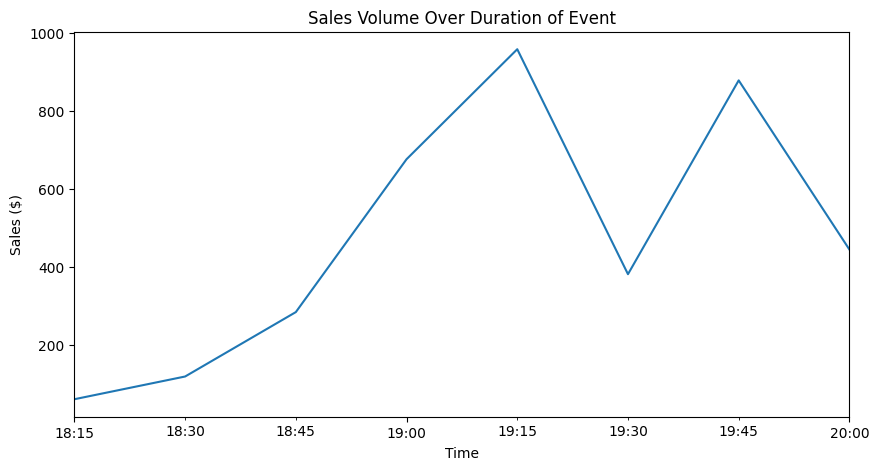

In [3]:
closed_checks_nonzero = closed_checks[(closed_checks['Check Amount'] >=0.1)] #Filter out rows where Check Amount equals zero

#----------------Plotting---------------#
tot = closed_checks_nonzero['Check Amount'].resample("15min").sum().plot(style="-", figsize=(10, 5)) #Plots transaction volume over 15 min intervals of time
tot.set_xlabel('Time') #x axis
tot.set_ylabel('Sales ($)')#y axis
tot.set_title("Sales Volume Over Duration of Event") #title

# Add boxes for intermissions
#tot.axvspan(pd.Timestamp("2023-05-15 " + time_str1), pd.Timestamp(f"2023-05-15 " + time_str1) + pd.Timedelta(minutes=20), alpha=0.2, color='green')
#tot.axvspan(pd.Timestamp("2023-05-15 " + time_str2), pd.Timestamp(f"2023-05-15 " + time_str2) + pd.Timedelta(minutes=20), alpha=0.2, color='green')

plt.show()

### **Average Speed of Check Duration**
Getting the average speed of duration at checkout

In [4]:
avg = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/Closed Checks (12).csv',  skiprows=3, date_format=date_format) #Skips first 3 rows in csv when loading in df 
avg['avg'] = pd.to_timedelta(avg['Check Duration'], unit='h') #Since are csv. is showing "Check Duration" in hours, we need to convert it into seconds
avg = avg[avg['Check Amount'] != 0] #Check amount cant equal 0

# Drop the row with the comment "GET RID OF THIS ROW"
avg = avg.drop(avg[avg['Check Number'] == 300005].index)
avg_check_duration = avg['avg'].mean() #Calculates average speed of transaction time

max_check_duration = avg['avg'].max()#Calculates maximum speed of transaction time
min_check_duration = avg['avg'].min()#Calculates minimum speed of transaction time

#Print results
print("Maximum Check Duration:", max_check_duration)
print("Minimum Check Duration:", min_check_duration)
print('AVG:', avg_check_duration)


Maximum Check Duration: 0 days 00:01:05.999999998
Minimum Check Duration: 0 days 00:00:11.999999998
AVG: 0 days 00:00:28.248447204


### **How to get data from Oracle**

#### ***OBI Ops .MV Data***
1. Login and go to **"Library"**
2. In **"Name"**, type in **"OBI Ops .MV"** and click the first result
3. Go to **"Edit Parameters"**, and change **"Business Dates"** to the date of the event, change **"Locations"** to **"Scotiabank Arena"**
4. In **"Revenue Center"**, click **"Advanced"** -> then **"Power Select"**. Select the following Revenue Centers:
   - QS Grab
   - QS Stand 9
   - Beer Portable 108
   - Vending 109
5. Click **"Run"**
6. Click the download button (arrow pointing down)
7. Load csv. file into variable <mark>"grabngo_df"</mark>

**Example:** `grabngo_df = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/OBI Ops .MV.csv', date_format=date_format).head(-5)`


In [5]:
#Data importing cleaning
date_format = '%H:%M:%S'
grabngo_df = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/OBI Ops .MV (7).csv', date_format=date_format).head(-5) #Load data in except last 5 rows (summary data)
grabngo_df = grabngo_df.loc[:, ~grabngo_df.columns.str.contains('^Unnamed')] #Delete values containing "Unnamed"
grabngo_df.dropna(inplace=True) #Drop NA values
grabngo_df['Checks Count'] = grabngo_df['Checks Count'].astype('float') #Change values in 'Check Count' to float
grabngo_df['Quarter Hour'] = grabngo_df['Quarter Hour'].astype('int') #Change values in 'Quarter Hour' to int
grabngo_df['Net Sales'] = grabngo_df['Net Sales'].astype('float') #Change values in 'Net Sales' to float

grabngo_df.info() #Displaying details of dataframe
grabngo_df






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Business Date        49 non-null     object 
 1   Business Hour        49 non-null     object 
 2   Quarter Hour         49 non-null     int32  
 3   Location Name        49 non-null     object 
 4   Revenue Center Name  49 non-null     object 
 5   Net Sales            49 non-null     float64
 6   Checks Count         49 non-null     float64
dtypes: float64(2), int32(1), object(4)
memory usage: 2.6+ KB


,Business Date,Business Hour,Quarter Hour,Location Name,Revenue Center Name,Net Sales,Checks Count
0,2023-08-10 00:00:00.0,18,76,Scotiabank Arena,Beer Portable 108,235.50,8.0
1,2023-08-10 00:00:00.0,13,54,Scotiabank Arena,QS Grab,0.04,4.0
2,2023-08-10 00:00:00.0,19,79,Scotiabank Arena,Beer Portable 108,490.00,17.0
3,2023-08-10 00:00:00.0,19,80,Scotiabank Arena,Beer Portable 108,806.00,25.0
4,2023-08-10 00:00:00.0,20,81,Scotiabank Arena,Vending 109,281.00,17.0
5,2023-08-10 00:00:00.0,20,83,Scotiabank Arena,QS Stand 9,91.14,6.0
6,2023-08-10 00:00:00.0,16,68,Scotiabank Arena,QS Grab,0.00,0.0
7,2023-08-10 00:00:00.0,18,76,Scotiabank Arena,QS Stand 9,859.75,35.0
8,2023-08-10 00:00:00.0,18,76,Scotiabank Arena,Vending 109,222.50,12.0
9,2023-08-10 00:00:00.0,19,78,Scotiabank Arena,Vending 109,346.75,25.0


### **Revenue Center Sales, Number of Transactions, and Average Basket Size**
Here we are comparing Grab and Go (QS Grab) to nearby stands in terms if revenue and count of transactions. Then we calculate the average basket size for QS Grab.

In [6]:
revenue_center_sales = grabngo_df.groupby('Revenue Center Name')['Net Sales'].sum() #Sum of sales grouped by stand
number_of_transactions = grabngo_df.groupby('Revenue Center Name')['Checks Count'].sum() #Sum of transactions grouped by stand
average_basket_size = revenue_center_sales['QS Grab '] / number_of_transactions['QS Grab '] #Average basket size of G&G stand

#Print results
print(revenue_center_sales)
print(number_of_transactions)
print()
print("The average basket size for QS Grab is:", average_basket_size)


Revenue Center Name
Beer Portable 108    3160.00
QS Grab              3330.71
QS Stand 9           5573.78
Vending 109          2110.91
Name: Net Sales, dtype: float64
Revenue Center Name
Beer Portable 108    106.0
QS Grab              161.0
QS Stand 9           237.0
Vending 109          128.0
Name: Checks Count, dtype: float64

The average basket size for QS Grab is: 20.687639751552794


### Intermission Time Calculations

***This logic was created by Kaustubh (reach out for rundown if needed) for intermission time calculations.***

quarter_hour_first_first is calculated as the quarter_hour value (rounded minutes in quarter-hour intervals) plus 1. 
This is because quarter_hour represents the quarter-hour interval that just ended, and we are interested in the quarter-hour interval that starts immediately after the first intermission.

For example, if the first intermission occurs at 8:15 PM, the quarter_hour value would be 33 (i.e., 8:15 PM is in the 33rd quarter-hour interval of the day)

Since we are interested in the interval immediately following the intermission, quarter_hour_first_first would be 34.

<mark>**Only implement this for sporting events that have intermissions**</mark>

In [9]:
first_intermission = time_str1
hour, minutes = first_intermission.split(":")
hour =float(hour)
minutes = float(minutes)
quarter_hour = np.round((hour*60+minutes)/15)
quarter_hour_first_first = float(quarter_hour)+1
quarter_hour_first_second = quarter_hour_first_first+1
quarter_hour_first_first

80.0

### **Total Count of Transactions**
Bar plot comparing the total count of transactions at Grab and Go, to the average count of transactiosn at 3 nearby stands

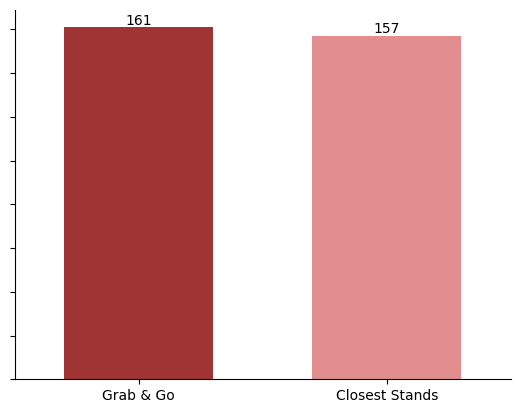

In [7]:
grabngo_df.loc[grabngo_df['Revenue Center Name']== 'QS Grab ', 'Revenue Center Name'] = 'Grab & Go' # Replace 'QS Grab' with 'Grab & Go' in the 'Revenue Center Name' column

# Replace 'Beer Portable 108','QS Stand 9', and 'Vending 109' with 'Closest Stands' in the 'Revenue Center Name' column
grabngo_df.loc[grabngo_df['Revenue Center Name']== 'Beer Portable 108', 'Revenue Center Name'] = 'Closest Stands'
grabngo_df.loc[grabngo_df['Revenue Center Name']== 'QS Stand 9', 'Revenue Center Name'] = 'Closest Stands'
grabngo_df.loc[grabngo_df['Revenue Center Name']== 'Vending 109', 'Revenue Center Name'] = 'Closest Stands'

grabngo_first_total_grouped = grabngo_df.groupby('Revenue Center Name').sum().reset_index() # Group the data by 'Revenue Center Name' and sum the other columns
grabngo_first_total_grouped.loc[grabngo_first_total_grouped['Revenue Center Name']== 'Closest Stands', 'Checks Count'] = np.round(grabngo_first_total_grouped['Checks Count']/3) #Divide by 3 to get the average of the stands
grabngo_first_total_grouped = grabngo_first_total_grouped.drop(["Business Date", "Business Hour"], axis=1)  # Drop the 'Business Date' and 'Business Hour' columns from the grouped data
grabngo_first_total_grouped.sort_values(by = 'Revenue Center Name', ascending=False, inplace=True) # Sort the grouped data by 'Revenue Center Name' in descending order

#Plotting
colors = ['firebrick', 'lightcoral', 'lightcoral'] #List of colors for the bar plot

#Create the bar plot using seaborn
ax = sns.barplot(
    data=grabngo_first_total_grouped,        # The DataFrame containing the data for the plot
    x=grabngo_first_total_grouped['Revenue Center Name'],  # Data for the x-axis (Revenue Center Names)
    y=grabngo_first_total_grouped['Checks Count'],        # Data for the y-axis (Check Counts)
    width=0.6,                                       # Width of the bars
    palette=colors                                   # Colors for the bars
)

#Set the x-axis label to None (no label)
ax.set(xlabel=None)

#Set the y-axis label to None (no label)
ax.set(ylabel=None)

#Loop through the bar containers to add labels to each bar
for i in ax.containers:
    ax.bar_label(i,)

#Set the y-axis tick labels to an empty list (no tick labels)
ax.set(yticklabels='')

#Remove the top and right spines (borders) of the plot for a cleaner look
sns.despine()





In [10]:
first_intermission = grabngo_df.loc[(grabngo_df['Quarter Hour']== quarter_hour_first_first) | (grabngo_df['Quarter Hour']== quarter_hour_first_second)] #select rows from grabngo_df that have the same quarter hour as the first intermission
first_intermission_grouped = first_intermission.groupby('Revenue Center Name').sum().reset_index() #group the rows by Revenue Center Name and calculate the sum of the other columns
first_intermission_grouped.loc[first_intermission_grouped['Revenue Center Name']== 'Closest Stands', 'Checks Count'] = np.round(first_intermission_grouped['Checks Count']/3) #ask Kaustubh
first_intermission_grouped = first_intermission_grouped.drop(["Business Date", "Business Hour"], axis=1)  # Drop the 'Business Date' and 'Business Hour' columns from the grouped data
first_intermission_grouped.sort_values(by = 'Revenue Center Name', ascending=False, inplace=True) #first_intermission_grouped.sort_values(by = 'Revenue Center Name', ascending=False, inplace=True)
first_intermission_grouped

NameError: name 'quarter_hour_first_first' is not defined

### Count of Transactions During Intermissions

In [8]:
first_intermission = grabngo_df.loc[(grabngo_df['Quarter Hour']== quarter_hour_first_first) | (grabngo_df['Quarter Hour']== quarter_hour_first_second)] #select rows from grabngo_df that have the same quarter hour as the first intermission
first_intermission_grouped = first_intermission.groupby('Revenue Center Name').sum().reset_index() #group the rows by Revenue Center Name and calculate the sum of the other columns
first_intermission_grouped.loc[first_intermission_grouped['Revenue Center Name']== 'Closest Stands', 'Checks Count'] = np.round(first_intermission_grouped['Checks Count']/3) #ask Kaustubh
first_intermission_grouped = first_intermission_grouped.drop(["Business Date", "Business Hour"], axis=1)  # Drop the 'Business Date' and 'Business Hour' columns from the grouped data
first_intermission_grouped.sort_values(by = 'Revenue Center Name', ascending=False, inplace=True) #first_intermission_grouped.sort_values(by = 'Revenue Center Name', ascending=False, inplace=True)
first_intermission_grouped

# Sort the DataFrame by 'Checks Count' in descending order
first_intermission_grouped.sort_values(by='Checks Count', ascending=False, inplace=True)

# Set the colors for the bar plot
colors = ['firebrick', 'lightcoral', 'lightcoral']

# Create the bar plot
ax = sns.barplot(data=first_intermission_grouped, x='Revenue Center Name', y='Checks Count', palette=colors)
ax.set(xlabel=None, ylabel=None)

#Loop through the bar containers to add labels to each bar
for i in ax.containers:
    ax.bar_label(i,)
ax.set(yticklabels='')
sns.despine()

NameError: name 'quarter_hour_first_first' is not defined

#### ***Menu Mix Detail Data***
1. Login and go to **"Library"**
2. In **"Name"**, type in **"Menu MIx Detail"** and click the first result
3. Go to **"Edit Parameters"**, and change **"Business Dates"** to the date of the event, change **"Locations"** to **"Scotiabank Arena"**
4.  **"Revenue Center"** to **"QS Grab"**, click **"Run"**
5. Click the download button (arrow pointing down)
6. Load csv. file into variable <mark>"menu_mix"</mark>

**Example:** `menu_mix = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/Menu MIx Detail.csv', date_format=date_format).head(-5)`

In [8]:
#Data importing cleaning
menu_mix = pd.read_csv('C:/Users/tmanett/Desktop/Grab & Go/Menu MIx Detail (8).csv') #Load data in except last 5 rows (summary data)

menu_mix.info()
menu_mix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Business Date               35 non-null     object 
 1   Location Name               35 non-null     object 
 2   Revenue Center Name         35 non-null     object 
 3   Major Group Name            35 non-null     object 
 4   Family Group Name           35 non-null     object 
 5   Menu Item Number            35 non-null     int64  
 6   Menu Item Name              35 non-null     object 
 7   Sales Count                 35 non-null     int64  
 8   Sales Total                 35 non-null     float64
 9   Discounts Amount            35 non-null     float64
 10  Gross Sales after Discount  35 non-null     float64
dtypes: float64(3), int64(2), object(6)
memory usage: 3.1+ KB


,Business Date,Location Name,Revenue Center Name,Major Group Name,Family Group Name,Menu Item Number,Menu Item Name,Sales Count,Sales Total,Discounts Amount,Gross Sales after Discount
0,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Alcohol,Beer Btl Premium,82230080,"QSB,Beer,Hop Valley Bubble Stash",1,14.00,0.0,14.00
1,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Food,QS Snacks,82220118,"QS,Kiosk Test Item",21,0.21,0.0,0.21
2,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Alcohol,Wine White,81110067,"QSB,Cooler,Bread & Butter Rose,2",2,39.00,0.0,39.00
3,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Alcohol,Coolers,81161845,"QSB,Smirnoff Tallboy Cooler",7,98.00,0.0,98.00
4,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Alcohol,Beer Btl Premium,81120101,"QSB,Beer,Can,Creemore,Pale,Ale,T",4,56.00,0.0,56.00
5,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Alcohol,Beer Btl Premium,81120061,"QSB,Beer,Blue Moon Tallboy",2,28.00,0.0,28.00
6,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Food,QS Snacks,82220033,"QSV,Chocolate,M&M Peanut 200g",10,120.00,0.0,120.00
7,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Alcohol,Coolers,81162084,"QSB,Cooler,Arizona Hard Ice Tea",6,84.00,0.0,84.00
8,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Food,QS Snacks,82220019,"QS,Popcorn Production 130oz",10,102.50,0.0,102.50
9,2023-08-10 00:00:00.0,Scotiabank Arena,QS Grab,Alcohol,Beer Btl Premium,81120062,"QSB,Beer,Creemore Lot 9 Pilsner",1,14.00,0.0,14.00


### **Alcohol vs. Food** **Ignore for Now**
Pie charts displaying ratio of food to alcohol sales and count of transactions

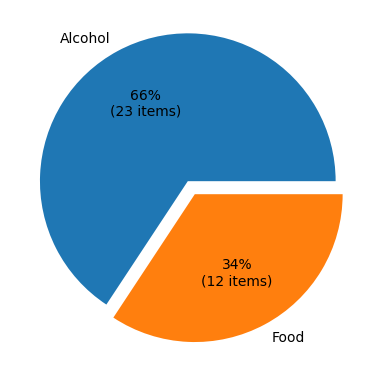

In [9]:
# Calculate the count of items for the 'Alcohol' major group
alc_count = len(menu_mix[menu_mix['Major Group Name'] == 'Alcohol'])

# Calculate the count of items for the 'Food' major group
food_count = len(menu_mix[menu_mix['Major Group Name'] == 'Food'])

# Create a list containing the counts of items for each major group
counts = [alc_count, food_count]

# Define an explode list to separate a slice from the pie chart (0.1 for the 'Alcohol' slice, 0 for the 'Food' slice)
myexplode = [0.1, 0]

# Create a pie chart with the specified counts and labels, and explode the 'Alcohol' slice by 0.1
# The autopct parameter is used to display the percentage and the number of items for each slice.
plt.pie(counts, labels=['Alcohol', 'Food'], explode=myexplode, autopct=lambda pct: f"{pct:.0f}%\n({int(pct/100*sum(counts))} items)")

# Display the pie chart
plt.show()

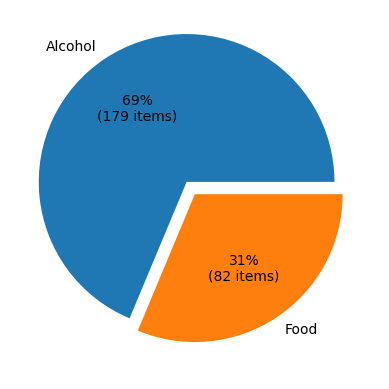

In [10]:
major_group_sales = menu_mix.groupby('Major Group Name')['Sales Count'].sum() #Sum of sales grouped by product type

alc_sales = major_group_sales['Alcohol'] # Product type = alcohol
food_sales = major_group_sales['Food'] # Product type = food

# Create a list containing the counts of items for each major group
counts1 = [alc_sales, food_sales]

myexplode = [0.1, 0]

# Calculate percentages and round to one decimal place
percentages = [round(count/sum(counts1)*100, 1) for count in counts1]

# Create the pie chart and show the counts
plt.pie(percentages, labels=['Alcohol', 'Food'], explode=myexplode, autopct=lambda pct: f"{pct:.0f}%\n({int(pct/100*sum(counts1))} items)")
plt.show()


### **Top 5 Selling Products**

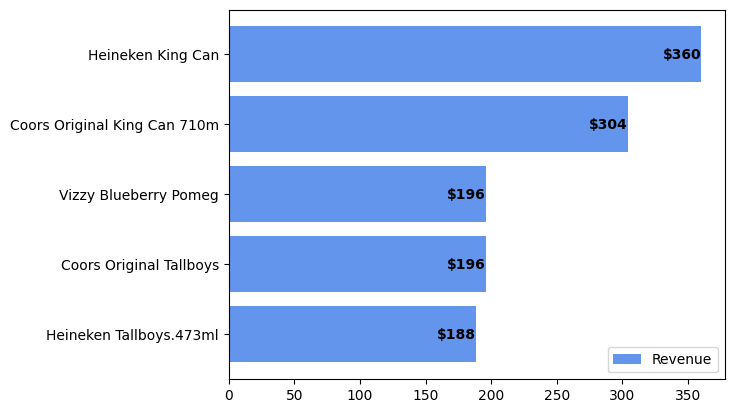

The top 5 selling items account for 37% of total sales.


In [11]:
top5_df = menu_mix.groupby('Menu Item Name')['Sales Total'].sum().reset_index().sort_values(by='Sales Total', ascending=False).head(5) # Group the menu_mix dataframe by 'Menu Item Name' and sum the 'Sales Total' column for each group

top5_df['Menu Item Name'] = top5_df['Menu Item Name'].apply(lambda x: x.split(',', 1)[-1]) # Remove characters before the first comma

x1_top5 = top5_df['Sales Total'].tolist() # Get the top 5 items in terms of total sales and reverse the order
x1_top5.reverse()
y_top5 = top5_df['Menu Item Name'].tolist() # Get the names of the top 5 items and reverse the order
y_top5 = [item.split(',', 1)[-1] for item in top5_df['Menu Item Name']] #This list comprehension splits each item in top5_df['Menu Item Name'] at the comma, and only keeps the second item onwards (specified by [-1]).
y_top5.reverse()



b1 = plt.barh(y_top5, x1_top5, color="cornflowerblue") # create a horizontal bar chart with the top 5 best selling products and their retail values
plt.legend(b1, ["Revenue"], loc="lower right") # add a legend to the chart

# add the retail values as text to each bar of the chart
for i, v in enumerate(x1_top5):
    plt.text(v, i, "${:.0f}".format(v), color='black', fontweight='bold', fontsize=10, ha='right', va='center')

plt.show()

# calculate total sales
total_sales = menu_mix['Sales Total'].sum()

# sum up the sales total of the top 5 items
top5_sales = top5_df['Sales Total'].sum()

# calculate the percentage of total sales made by the top 5 items
percent_top5_sales = (top5_sales / total_sales) * 100

print("The top 5 selling items account for {:.0f}% of total sales.".format(percent_top5_sales))
